### Modelagem com KNN

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [42]:
df = pd.read_csv('./data_root/clean_dataset.csv')
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sedentary Hours Per Day,Income,IMC,Triglycerides,Sleep Hours Per Day,Country,Heart Attack Risk,is_Male,Systolic,Diastolic
0,0.680556,0.314286,72,0,0,1,0,0,0.208326,0,...,0.551234,0.862268,0.602363,0.332468,0.333333,Argentina,0,1,0.755556,0.56
1,0.041667,0.960714,98,1,1,1,1,1,0.090557,2,...,0.413584,0.949316,0.417945,0.266234,0.500000,Canada,0,1,0.833333,0.66
2,0.041667,0.728571,72,1,0,0,0,0,0.103815,1,...,0.788642,0.768939,0.462573,0.723377,0.000000,France,0,0,0.933333,0.78
3,0.916667,0.939286,73,1,1,1,0,1,0.491376,0,...,0.637413,0.377210,0.839394,0.451948,0.000000,Canada,0,1,0.811111,0.80
4,0.666667,0.707143,93,1,1,1,1,0,0.290147,2,...,0.126150,0.501954,0.173077,0.261039,0.166667,Thailand,0,1,0.011111,0.56


In [43]:
X = df.drop(['Country','Heart Attack Risk'],axis=1)
Y = df['Heart Attack Risk']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42) 
knn =  KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
y_pred = knn.predict(x_test)
print('Acurácia:', mean_squared_error(y_test, y_pred))

Acurácia: 0.4517969195664575


In [45]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report)
df_report 

,0,1,accuracy,macro avg,weighted avg
precision,0.649327,0.371473,0.548203,0.510400,0.549788
recall,0.643556,0.377389,0.548203,0.510472,0.548203
f1-score,0.646429,0.374408,0.548203,0.510418,0.548979
support,1125.000000,628.000000,0.548203,1753.000000,1753.000000


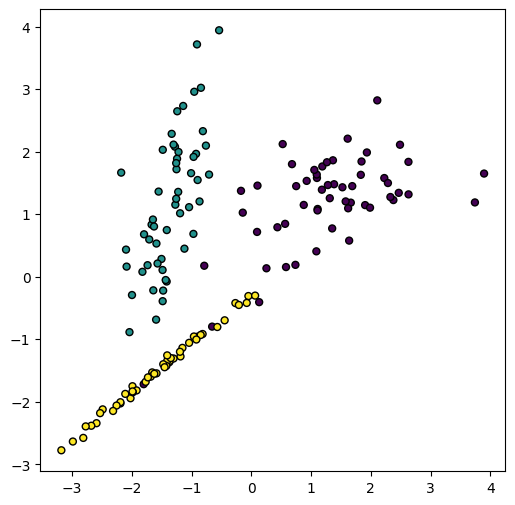

In [46]:
plt.figure(figsize= (6,6)) 
plt.subplot(111) 
X1, Y1 = make_classification(n_samples=158, n_features= 2, n_redundant= 0, n_informative=2, n_clusters_per_class= 1, random_state= 3, class_sep= 1.3, n_classes= 3) 
plt.scatter(X1[:,0], X1[:,1], marker="o", c=Y1, s=25, edgecolor="k")
plt.show()

# Testando com Grid Search

In [48]:
paramgrid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [49]:
grid_search = GridSearchCV(estimator=knn, param_grid=paramgrid, cv=5, scoring='accuracy')

In [50]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [51]:
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor pontuação:", grid_search.best_score_)

Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Melhor pontuação: 0.5968616262482168


In [52]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test)
print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred))

Acurácia no conjunto de teste: 0.5995436394751854


Acima foi feito um modelo de teste para o nosso dataset com KNN para tirar dúvidas sobre qual modelo seria mais apropriado para o projeto. E como imaginado o RandomForest atingiu melhor as nossas espectativas, alcancançando métricas de até 90% enquanto o KNN chega até 59% de acurácia no máximo.